<a href="https://colab.research.google.com/github/bich1970/DailyCovTracking2020/blob/master/Covid19_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
# Updates on Covid-19 cases

#by Bushara Sagr

 
**### Data source:** 

   Johns-hopkins-covid-19 free dataset from github 'a software development platform'.
read full story of this most vistid and trusted data here:

https://edition.cnn.com/2020/07/11/health/johns-hopkins-covid-19-map-team-wellness-trnd/index.html

  Johns-hopkins-covid-19 Dashboard link:
 
  "https://coronavirus.jhu.edu/"


## original code source of this presentation from article puplished in https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6 , with adjustment to fulfill the needs of this presentation.

**# Data processing and visualizing Tools:**

###  -python coding environment:
###  - pandas and Numpy liberary for processing and preparing dataset
###  - wget python liberrary to get raw data
###  -seaborn- for Geaplotting Graph
###  - Altair as main data visualization tool

**### Code Environment:**
###  - Google colab notebook 

### **key analytics:**

**Variables:**


   - Total Confirmed cases
   - daily new cases
   - daily new deaths
   -daily recoveries
  
**Targets:**
   - Saudia Arabia cases trends
   -top 4 countries by # of confirmed cases
   - Arab states trends
   - Selected countries trends
   - Selected Almoosa Caregivers states trends 



      

**# Preparing and processing the Data**

# Preparing and processing the Data

---



In [82]:
!pip install wget

In [83]:
 ## importing required libraries
import pandas as pd
import numpy as np
import altair as alt
import wget
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map

In [84]:
#importing dataset from john-hopkins github site url:
 
urls = [
    
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    
       'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
 
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global (2).csv',
 'time_series_covid19_deaths_global (2).csv',
 'time_series_covid19_recovered_global (2).csv']

In [85]:
 
 
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [86]:
 
 
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687


In [87]:
 
 
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10,10,10,10,10,11,11,13,15,17,18,19,19,19,21,21,22,23,23,26,26,26,27,28,29,29


In [88]:
 
 
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078,8196,8324,8422,8559,8674,8792,8920,9066,9202,9371,9674,9897,10040,10342,10832,11181,11492,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792,15107,15430,15744
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,757,759,780,781,781,781,789,789,791,792,792,792,792,796,797,797,797,799,799,799,799,799,799,800,800,800,800,800,800,802,802,803,803,803,803,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,40,41,42,61,61,64,64,64,64,66,66,77,77,77,77,81,81,81,81,93,93,97,97,107,108,108,108,117,117,117,117,118,118,118,118,124,124,199,210


In [89]:
 
 
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20',
       '7/15/20', '7/16/20', '7/17/20', '7/18/20'],
      dtype='object', length=183)

In [90]:
 
 
deaths_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20',
       '7/15/20', '7/16/20', '7/17/20', '7/18/20'],
      dtype='object', length=183)

In [91]:
 
 
recovered_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/9/20', '7/10/20', '7/11/20', '7/12/20', '7/13/20', '7/14/20',
       '7/15/20', '7/16/20', '7/17/20', '7/18/20'],
      dtype='object', length=183)

In [92]:
 
 
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [93]:
 
 
confirmed_df_long.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [94]:
 
 
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

In [95]:
 
 
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [96]:
 
 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [97]:
 
 
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [98]:
 
 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0


In [99]:
 
 
full_table.isna().sum()

Province/State    33115
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          4475
dtype: int64

In [100]:
 
 
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [101]:
 
 
full_table.isna().sum()

Province/State    33115
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [102]:
 
 
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

In [103]:
 
 
full_table = full_table[~(ship_rows)]

In [104]:
 
 
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [105]:
 
 
full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,0.0


In [106]:
 
 
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [107]:
 
 
full_grouped.head(5)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0


In [108]:
 
 
# new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [109]:
 
 
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [110]:
#reading prepared data sa CSV file
 
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')

In [111]:
last_data = full_grouped[full_grouped['Date']=='2020-07-18']
last_data

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
33108,2020-07-18,Afghanistan,35301,1164,23273.0,10864.0,72,17,122
33109,2020-07-18,Albania,4008,111,2264.0,1633.0,102,4,50
33110,2020-07-18,Algeria,22549,1068,15744.0,5737.0,601,11,314
33111,2020-07-18,Andorra,880,52,803.0,25.0,0,0,0
33112,2020-07-18,Angola,687,29,210.0,448.0,49,0,11
...,...,...,...,...,...,...,...,...,...
33289,2020-07-18,West Bank and Gaza,8204,59,1596.0,6549.0,440,6,104
33290,2020-07-18,Western Sahara,10,1,8.0,1.0,0,0,0
33291,2020-07-18,Yemen,1581,443,701.0,437.0,5,3,6
33292,2020-07-18,Zambia,2980,120,1462.0,1398.0,170,11,12


In [112]:
world = last_data.groupby(['Country/Region'])[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
world.head(5)

,Country/Region,Confirmed,Active,Recovered,Deaths
0,Afghanistan,35301,10864.0,23273.0,1164
1,Albania,4008,1633.0,2264.0,111
2,Algeria,22549,5737.0,15744.0,1068
3,Andorra,880,25.0,803.0,52
4,Angola,687,448.0,210.0,29


#Current disease spreading Map

---



In [113]:
#Covid-19 spreading map across nations 
figure = px.choropleth(world,locations='Country/Region', 
locationmode='country names', color='Confirmed',
hover_name='Country/Region', color_continuous_scale='tealgrn', range_color=
[1,1000000],title='Covid-19 spreading map across nations by total number of confirmed cases')
figure.show()

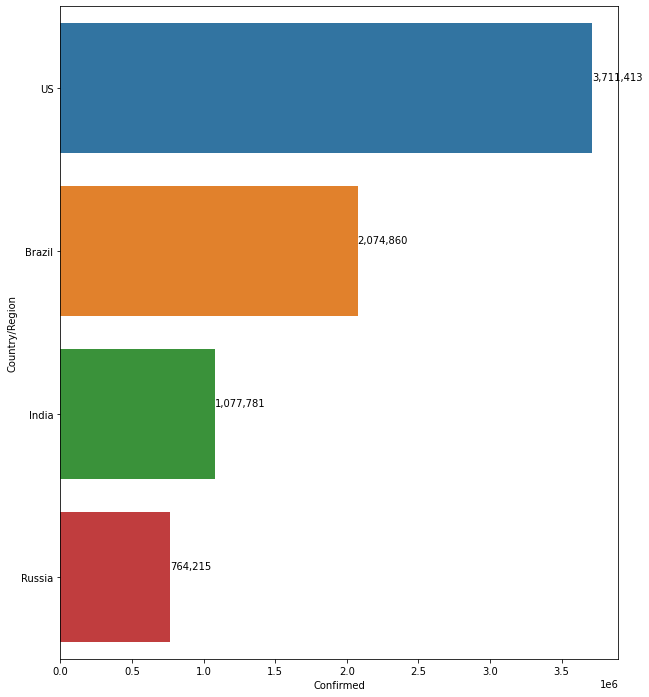

In [114]:
# top 5 states by Number of total confirmed cases
 
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(4)
### Generate a Barplot
plt.figure(figsize=(10,12))
plot = sns.barplot(top_20['Confirmed'], top_20['Country/Region'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country/Region'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

In [115]:
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
thesecountries = ['US','Brazil','India','Russia']
trending_countries = full_grouped[full_grouped['Country/Region'].isin(thesecountries)]

In [116]:
brush = alt.selection(type='interval')
 
points = alt.Chart(trending_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
).properties(title='Trending Countries per # of confirmed Cases')
 
bars = alt.Chart(trending_countries).mark_bar().encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

alt.VConcatChart(...)

In [117]:

full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
countries = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland','Brazil','India','Russia','South Africa','Mexico']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [118]:
brush = alt.selection(type='interval')
 
points = alt.Chart(selected_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
)
 
bars = alt.Chart(selected_countries).mark_bar(size=15).encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

alt.VConcatChart(...)

# Total Confirmed vs total Deaths:

---



In [119]:
 
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
Saudia = full_grouped[full_grouped['Country/Region'] == 'Saudi Arabia']
Saudia

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
145,145,2020-01-22,Saudi Arabia,0,0,0.0,0.0,0,0,0
331,331,2020-01-23,Saudi Arabia,0,0,0.0,0.0,0,0,0
517,517,2020-01-24,Saudi Arabia,0,0,0.0,0.0,0,0,0
703,703,2020-01-25,Saudi Arabia,0,0,0.0,0.0,0,0,0
889,889,2020-01-26,Saudi Arabia,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
32509,32509,2020-07-14,Saudi Arabia,237803,2283,177560.0,57960.0,2692,40,7718
32695,32695,2020-07-15,Saudi Arabia,240474,2325,183048.0,55101.0,2671,42,5488
32881,32881,2020-07-16,Saudi Arabia,243238,2370,187622.0,53246.0,2764,45,4574
33067,33067,2020-07-17,Saudi Arabia,245851,2407,191161.0,52283.0,2613,37,3539


In [120]:
 
base = alt.Chart(Saudia).mark_line().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [121]:
 
red= alt.value("#f54242")
    
base.encode(y='Confirmed').properties(title='Total confirmed cases in Saudia Arabia')|base.encode(y='Deaths',color=red).properties(title='Total deaths in Saudia Arabia')

alt.HConcatChart(...)

In [122]:
 
 
red= alt.value("#f54242")
    
base.encode(y='New cases').properties(title='Daily New cases')|base.encode(y='New deaths',color=red).properties(title='Daily new deaths')

alt.HConcatChart(...)

In [123]:
 
red= alt.value("#f54242")
    
base.encode(y='New recovered').properties(title='Daily new recoveries')|base.encode(y='New deaths',color=red).properties(title='Daily new deaths')

alt.HConcatChart(...)

In [124]:
SAUDIA = full_grouped[full_grouped['Country/Region'].isin(['Saudi Arabia'])]

In [125]:
#New cases vs recovered in Saudia Arabia
##until may very few recoveries compared to new cases but ,starting from May daily
## recovrie start exceeding new cases , this is very good news.

brush = alt.selection(type='interval')

points = alt.Chart(SAUDIA).mark_circle().encode(
    x='New cases:Q',
    y='New recovered:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(SAUDIA).mark_bar().encode(
    y='month(Date):N',
    color='month(Date):N',
    x='Confirmed:Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

# Arab Countries 

---



In [ ]:
 
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
Arabcountries = ['Saudi Arabia', 'Sudan', 'Egypt', 'United Arab Emirates', 'Kuwait', 'Jordan', 'Bahrain', 'Qatar', 'Tunisia','Morocco','Sudan','Algeria','Yemen','Iraq','Syria','Oman']
selected_arab_countries = full_grouped[full_grouped['Country/Region'].isin(Arabcountries)]



In [81]:
brush = alt.selection(type='interval')
 
points = alt.Chart(selected_arab_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
)
 
bars = alt.Chart(selected_arab_countries).mark_bar().encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

NameError: ignored

# Selected nation states status :-

---



In [ ]:
 
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
ASH_countries = ['Saudi Arabia','Pakistan','Portugal','Bangladesh','Philippines','Egypt','Afghanistan','Sudan','Lebanon','Kenya','Jordan','Nepal','Uganda','Yemen','Syria','India','Sri Lanka']
selected_ASH_Employee_countries = full_grouped[full_grouped['Country/Region'].isin(ASH_countries)]

In [ ]:
brush = alt.selection(type='interval')
 
points = alt.Chart(selected_ASH_Employee_countries).mark_circle().encode(
    x='New cases:Q',
    y='New deaths:Q',
    color=alt.condition(brush, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
    brush
).properties(title='Trendings in selected Almoosa Employee Countries')
 
bars = alt.Chart(selected_ASH_Employee_countries).mark_bar().encode(
    y='Country/Region:N',
    color='Country/Region:N',
    x='Confirmed:Q'
).transform_filter(
    brush
)
 
points & bars

alt.VConcatChart(...)

# thanks for your patient